<a href="https://colab.research.google.com/github/Michael-Jimenez-C/ACM-Material-pygroup/blob/main/Clase%204_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Clasificación

Es un proceso en el cual se asigna a un objeto una clase por algun criterio, por ejemplo las caracteristicas físicas del objeto, la composicion, etc.

##Ejemplo: clasificación por cercanía

Si un objeto tiene unas caracteristicas que se encuentran a poca distancia de otro objeto que si está clasificado se puede tratar de asignar dicha clase al objeto nuevo.

Regla:
$$a\in C\iff \exists_{bD}|(b\in C \land d(a,b)<d(a,D))$$

Esta puede aplicarse sobre el conjunto total o solo sobre la muestra original

###Actualizando el set de datos

Al actualizarlo ocurre un problema y es que depende de cual se "expanda" más, lo cual no es muy útil ya que puede generar errores a largo plazo.

Aunque puede ser util para otro tipo de utilidades, no necesariamente relacionado con la clasificación.

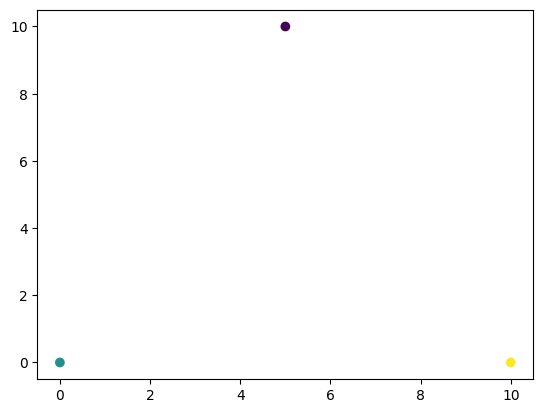

In [ ]:
#@title Datos
datos=pd.DataFrame()
datos["X1"]=[5,0,10]
datos["X2"]=[10,0,0]
datos["Clase"]=[1,2,3]
plt.scatter(datos["X1"],datos["X2"],c=datos["Clase"])

In [ ]:
X=[]
for i in range(50):
  for j in range(50):
    X.append((np.random.randint(0,100)/10,np.random.randint(0,100)/10))


In [ ]:
for i in X:
  dist=pow(pow(datos["X1"]-i[0],2)+pow(datos["X2"]-i[1],2),1/2)
  I=np.argmin(dist)
  datos=pd.concat([datos,pd.DataFrame({"X1":i[0],"X2":i[1],"Clase":datos["Clase"][I]},index=[len(datos)])])

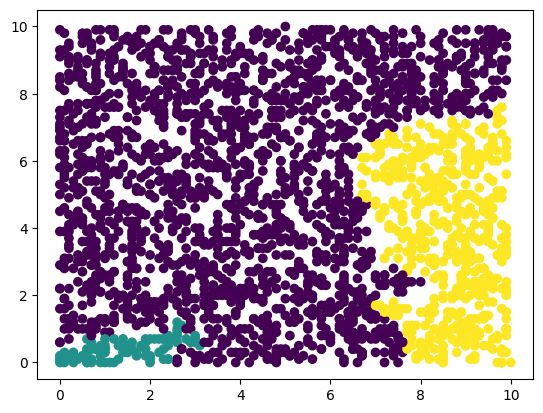

In [ ]:
plt.scatter(datos["X1"],datos["X2"],c=datos["Clase"])

###Sin actualizar el set de datos

In [ ]:
#@title Datos
datos=pd.DataFrame()
datos["X1"]=[5,0,10]
datos["X2"]=[10,0,0]
datos["Clase"]=[1,2,3]

In [ ]:
X=[]
for i in range(50):
  for j in range(50):
    X.append((np.random.randint(0,100)/10,np.random.randint(0,100)/10))

In [ ]:
datosNuevos=[]

In [ ]:
for i in X:
  dist=pow(pow(datos["X1"]-i[0],2)+pow(datos["X2"]-i[1],2),1/2)
  I=np.argmin(dist)
  datosNuevos.append([i[0],i[1],datos["Clase"][I]])
datosNuevos=np.array(datosNuevos)

In [ ]:
df=pd.DataFrame({"X1":datosNuevos.T[0],"X2":datosNuevos.T[1],"Clase":datosNuevos.T[2]})
dat=pd.concat([datos,df])

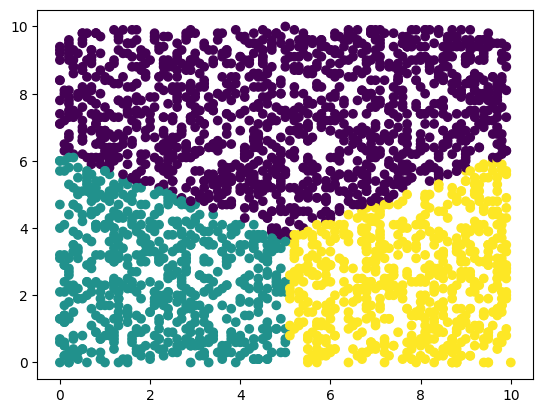

In [ ]:
plt.scatter(dat["X1"],dat["X2"],c=dat["Clase"])

#Arboles de decisión de regresión.

Un arbol de decisión es una estructura que se usa para tomar decisiones basado en condiciones, esto en codigo se puede hacer haciendo secuencias de if, pero es más interesante que un computador aprenda a construirlo basado en datos obtenidos, depende de como se construya puede lograrse obtener un arbol optimo o uno redundante.

En el caso de un arbol redundante se pueden aplicar tecnicas de poda para reducir la complejidad del arbol obtenido.

Para construir el arbol se puede utilizar multiples tecnicas, basadas en metricas como entropia, informacion, error cuadratico, error en categoria, etc., todas son metricas útiles para lograr arboles de decision de regresion de poca complejidad.

In [ ]:
class Nodo:
  def __init__(self,X,Y,car=0):
    self.padre=None
    self.hijos=[None,None]
    self.car=None
    self.valor=None
    self.c=None
    self.alt=1
    if len(np.unique(Y))>1:
      self.car=car%len(X.T)
      self.c=(max(X.T[self.car])+min(X.T[self.car]))/2
      p=X.T[self.car]<=self.c
      q=X.T[self.car]>self.c
      print("ok!")
      try:
        self.agregar(Nodo(X[p],Y[p],self.car+1),0)
        self.agregar(Nodo(X[q],Y[q],self.car+1),1)
      except:
        self.valor=np.unique(Y)[0]
    else:
      self.valor=np.unique(Y)[0]


  def agregar(self,nodo,dir):
    self.hijos[dir]=nodo
    nodo.padre=self

  def predict(self,X):
    if self.valor!=None:
      return np.ones(len(X))*self.valor
    else:
      v=np.ones(len(X))
      p=X.T[self.car]<=self.c
      q=X.T[self.car]>self.c
      v[p]=self.hijos[0].predict(X[p])
      v[q]=self.hijos[1].predict(X[q])
      return v
  def valorNodo(self,latex=False):
    if not latex:
      return f"x{self.car}<={round(self.c,2)}" if self.valor==None else f"{round(self.valor,2)}"
    return f"$x_{self.car}\leq{round(self.c,2)}$" if self.valor==None else f"${round(self.valor,2)}$"

  def mostrar(self,p=0):
    print(f"{'   '*p}:{self.valorNodo()}")

    if self.hijos[0]!=None:
      print(f"{'   '*(p+1)}Si se cumple")
      self.hijos[0].mostrar(p+1)

    if self.hijos[1]!=None:
      print(f"{'   '*(p+1)}Si no se cumple")
      self.hijos[1].mostrar(p+1)

  def altura(self):
    self.alt=1
    h=0
    if self.hijos[0]!=None:
      h=np.maximum(h,self.hijos[0].altura())
    if self.hijos[1]!=None:
      h=np.maximum(h,self.hijos[1].altura())

    self.alt+=h
    return self.alt
  def alturaD(self,dir=0):
    alt=1
    if self.hijos[dir]!=None:
      return alt+self.hijos[dir].alturaD(dir)
    return alt

In [ ]:
A=Nodo(np.array(dat[["X1","X2"]][:40]),dat["Clase"][:40])

ok!
ok!
ok!
ok!
ok!
ok!
ok!
ok!
ok!
ok!
ok!
ok!


In [ ]:
A.hijos[0].alturaD(1)

3

In [ ]:
Xt=np.array(X)
y=A.predict(Xt)
y

array([1., 1., 3., ..., 3., 3., 1.])

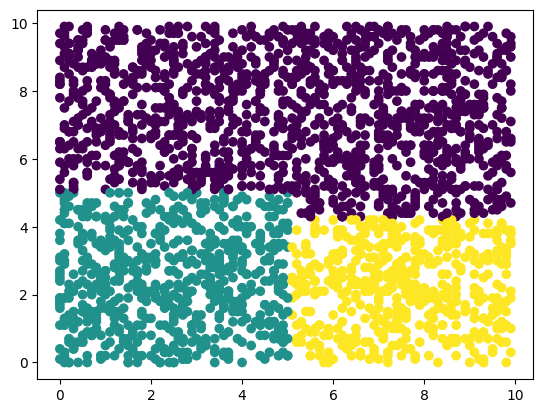

In [ ]:
plt.scatter(Xt.T[0],Xt.T[1],c=y)
#plt.scatter(datos["X1"],datos["X2"],c=datos["Clase"])

In [ ]:
A.mostrar()

:x0<=5.0
   Si se cumple
   :x1<=5.0
      Si se cumple
      :x0<=2.35
         Si se cumple
         :2.0
         Si no se cumple
         :x1<=3.5
            Si se cumple
            :2.0
            Si no se cumple
            :x0<=4.1
               Si se cumple
               :2.0
               Si no se cumple
               :1.0
      Si no se cumple
      :1.0
   Si no se cumple
   :x1<=4.2
      Si se cumple
      :3.0
      Si no se cumple
      :1.0


In [ ]:
class Visualizador:

  def mostrar(arbol:Nodo,x=None,y=None,espacio=None,desplazamiento=0):
    plt.axis("off")
    if x==None:
      altura=arbol.altura()
      x=altura*100
      y=altura

    if espacio==None:
      espacio=x/2
    else:
      espacio/=2

    if desplazamiento!=0:
      plt.plot([x+desplazamiento,x],[y,y+1],color="black")

    X=x+desplazamiento


    if arbol.hijos[0]!=None:
      Visualizador.mostrar(arbol.hijos[0],X,y-1,espacio,-espacio)
    if arbol.hijos[1]!=None:
      Visualizador.mostrar(arbol.hijos[1],X,y-1,espacio,+espacio)
    texto=arbol.valorNodo(True)
    plt.text(X-(40 if len(texto)>=10 else 15),y,texto,backgroundcolor="white",bbox=dict(boxstyle="round", fc="0.9"),fontsize=8)

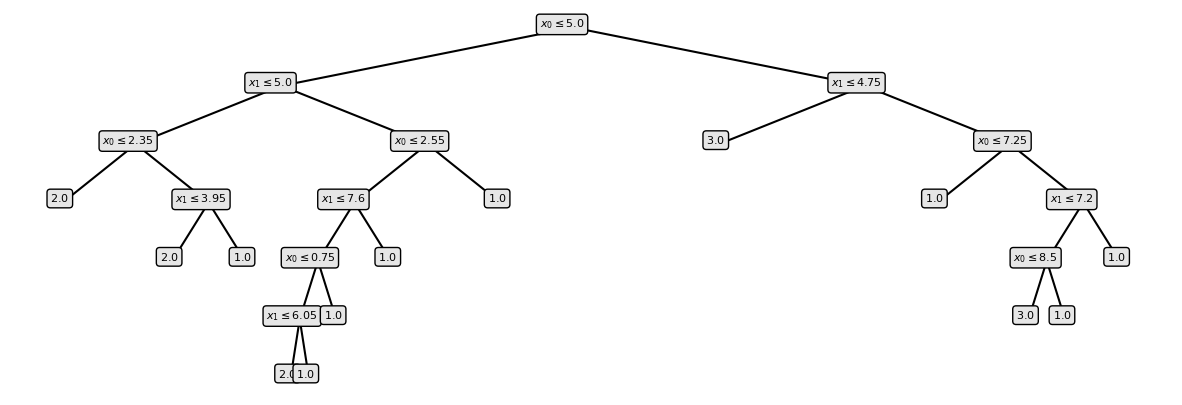

In [ ]:
plt.figure(figsize=(15,5))
Visualizador.mostrar(A)

##Arboles con librerias

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

B=DecisionTreeRegressor(random_state=1)

B.fit(np.array(datos[["X1","X2"]]),datos["Clase"])

DecisionTreeRegressor(random_state=1)

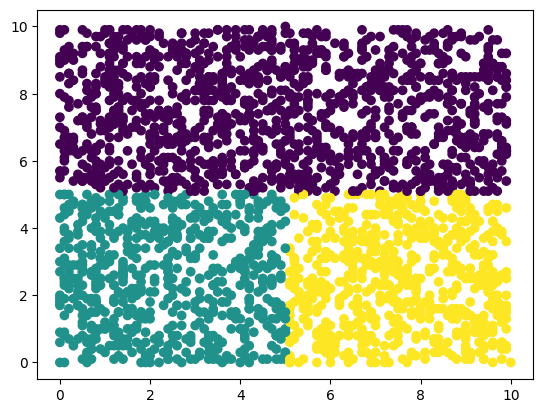

In [ ]:
Xt=np.array(X)
y=B.predict(Xt)
y
plt.scatter(Xt.T[0],Xt.T[1],c=y)
plt.scatter(datos["X1"],datos["X2"],c=datos["Clase"])

#Juego de la vida

El juego de la vida de John Conway es un juego de cero jugadores en el cual basado en simples reglas se logra un nuevo comportamiento de los agentes.

Pero no es el unico tipo de juego ni reglas, tambien se pueden construir nuevos tipos de reglas para lograr nuevos comportamientos.

Las reglas del juego de la vida de Conway son:

1. Las celulas que tengan 2 o 3 celulas adyacentes, viven.
2. Las celulas que tengan menos de 2 o más de 3, mueren.
3. Una celula muerta que tenga 3 adyacentes, vive o nace.

una alteracion interesante es en la condicion 1, y es cambier la condicion de igualdad del 2 a diferencia, lo cual hace que se expanda.

Para usos practicos se utilizará una matriz aunque es posible generar un juego de la vida sin limite de tamaño

In [2]:
class Tablero:
  def __init__(self,alto,ancho):
    self.celulas=[[0 for i in range(ancho)] for i in range(alto)]
    self.vivas=[]
    self.__tempvivas=[]

  def dibujar(self,i,j):
    self.celulas[i][j]=1
    self.vivas.append((i,j))
    plt.imshow(np.array(self.celulas).T,cmap='binary')

  def revision(self,x,y,nt):
    conteo=0
    for i in range(x-1,x+2):
        for j in range(y-1,y+2):
          if (i,j)!=(x,y):
            conteo+=self.celulas[i][j]
    if self.celulas[x][y]==0 and conteo==3:
      nt[x][y]=1
    elif self.celulas[x][y]==1 and (conteo==2 or conteo==3):
      nt[x][y]=1
    if (x,y) not in self.__tempvivas and nt[x][y]==1:
        self.__tempvivas.append((x,y))

  def paso(self):
    nt=[[0 for i in self.celulas[0]] for i in self.celulas[1]]
    for i in self.vivas:
      try:
        for j in range(i[0]-1,i[0]+2):
          for w in range(i[1]-1,i[1]+2):
            self.revision(j,w,nt)
      except:
        pass
    self.celulas=nt
    self.vivas=self.__tempvivas[:]
    self.__tempvivas=[]
    plt.imshow(np.array(self.celulas).T,cmap='binary')

In [90]:
t=Tablero(60,60)

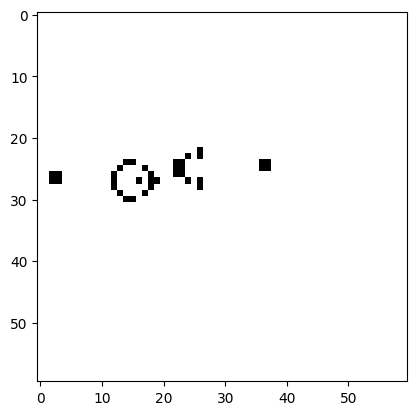

In [91]:
x=[1,1,2,2,
   11,11,11,
   12,12,
   13,13,14,14,
   15,
   16,16,
   17,17,17,18,
   21,21,21,
   22,22,22,
   23,23,
   25,25,25,25,
   35,35,36,36]
y=[6,7,7,6,
   6,7,8,
   5,9,
   4,10,4,10,
   7,
   5,9,
   6,7,8,7,
   4,5,6,
   4,5,6,
   3,7,
   2,3,7,8,
   4,5,4,5]
for i,j in zip(x,y):
  t.dibujar(i+1,j+20)

In [ ]:
for i in range(50):
  t.paso()
  plt.show()

#Algoritmos geneticos

Los algoritmos genéticos son algoritmos en el cual se tiene un grupo de individuos que representan la solucion a un problema y se busca mediante cruces y mutaciones obtener la mejor solucion a un problema.

El siguiente es un ejemplo sencillo en el cual se quiere escoger un grupo de productos, la maxima cantidad posible pero evitando sobrepasar el límite de peso.

In [22]:
limite=25
n=20
productos=np.array([np.random.randint(3,12) for i in range(n)])

In [5]:
grupo={}

In [ ]:
calculados={}

individuos=[]
for i in range(n):
  k=[np.random.choice([1,0]) for i in range(n)]
  if k not in individuos:
    individuos.append(k)
    #grupo[str(k)]=chr(ord('a')+i)

In [4]:
def error(soluciones,productos,limite):
  E=[]
  for i in soluciones:
    if str(i) in calculados:
      E.append(calculados[str(i)])
      continue
    E.append(abs(limite-sum([v*u for u,v in zip(productos,i)]))+len(productos)-sum(i))
    calculados[str(i)]=E[-1]
  return E

In [5]:
def evaluador(soluciones):
  candidatos=[]
  E1=error(soluciones,productos,limite)
  E2=[]
  for i in range(len(soluciones)):
    candidatos.append(soluciones[np.argmin(E1)])
    soluciones.pop(np.argmin(E1))
    E2.append(np.min(E1))
    E1.pop(np.argmin(E1))
  return candidatos,E2

In [6]:
def selector(candidatos,n):
  if len(candidatos)>n:
    candidatos=candidatos[:n]
  return candidatos

In [19]:
def cruce(candidatos):
  N=len(candidatos)
  for i in range(N):
    for j in range(i,N):
      if i!=j:
        vd=np.random.randint(0,len(candidatos[i]))
        T1=candidatos[i][:vd]+candidatos[j][vd:]
        T2=candidatos[j][:vd]+candidatos[i][vd:]
        if str(T1) not in calculados:
          candidatos.append(T1)
          #grupo[str(T1)]=f'hijo({grupo[str(candidatos[i])]},{grupo[str(candidatos[j])]})'
        if str(T2) not in calculados:
          candidatos.append(T2)
          #grupo[str(T2)]=f'hijo({grupo[str(candidatos[j])]},{grupo[str(candidatos[i])]})'
  return candidatos

In [20]:
def mutador(candidatos, cantidad):
  for i in range(cantidad):#tres mutaciones
    k=np.random.randint(0,len(candidatos))
    q=np.random.randint(0,len(candidatos[0]))
    mutado=candidatos[k][:]
    mutado[q]= 1 if candidatos[k][q] ==0 else 0
    if str(mutado) not in calculados:
      candidatos.append(mutado)
      #grupo[str(mutado)]=f'mutacion({grupo[str(candidatos[k])]})'
  return candidatos

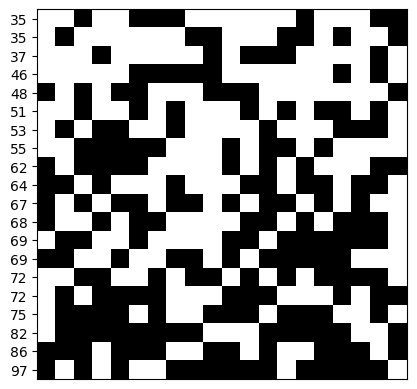

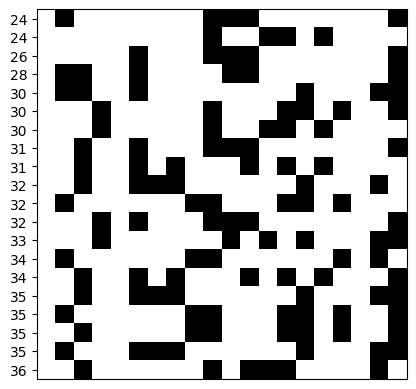

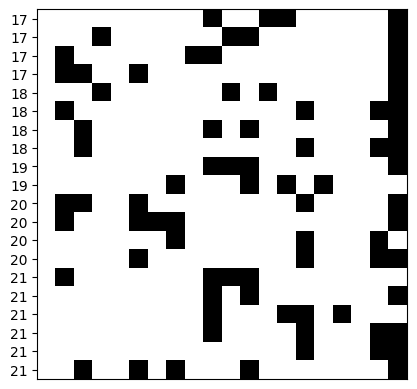

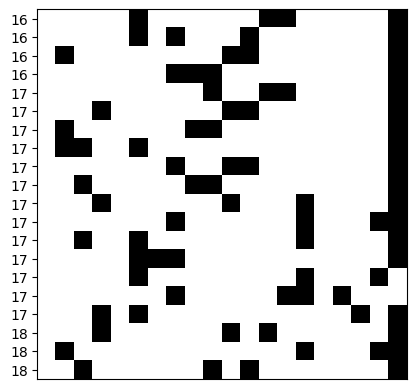

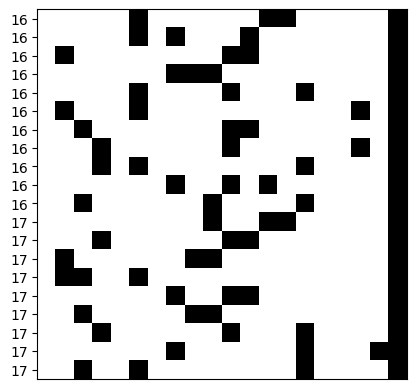

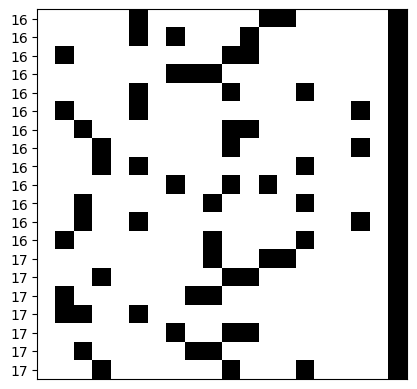

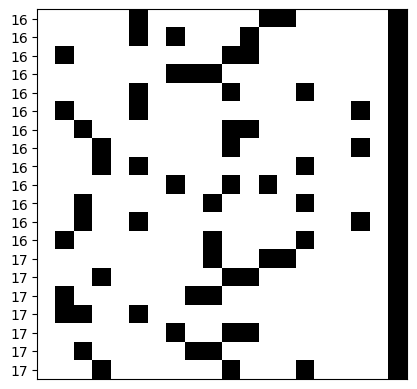

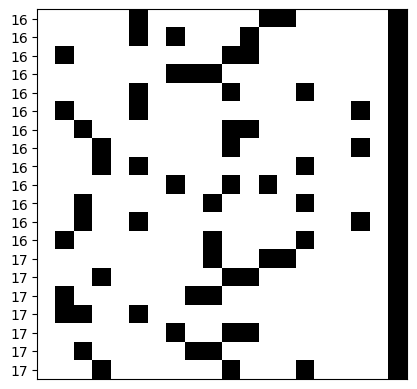

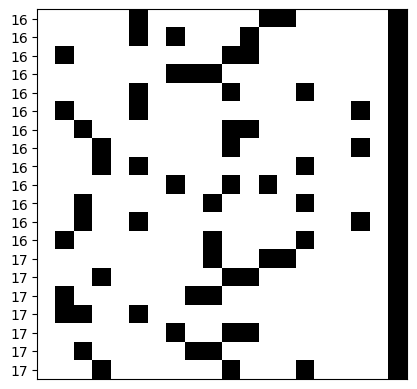

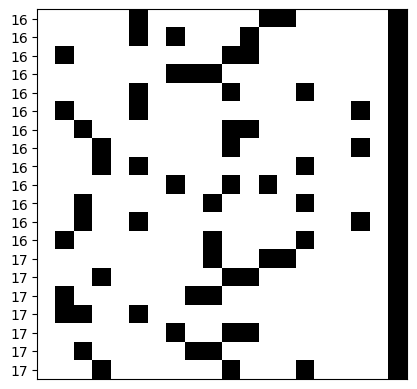

In [47]:
for _ in range(10):
  candidatos,E=evaluador(individuos)
  candidatos=selector(candidatos,n)

  plt.imshow(candidatos,cmap='binary')
  plt.yticks([i for i in range(len(candidatos))],[E[i] for i in range(len(candidatos))])
  plt.xticks([])
  plt.show()

  candidatos=cruce(candidatos)

  mutador(candidatos, 5)

  individuos=candidatos
#mejor solucion
sol=individuos[0]

In [48]:
for i in individuos[:5]:
   print(i@productos, sum(i))

25 4
25 4
25 4
25 4
25 4


In [38]:
grupo[str(sol)]

'hijo(mutacion(hijo(i,q)),hijo(mutacion(hijo(mutacion(hijo(d,q)),hijo(i,p))),mutacion(mutacion(hijo(c,h)))))'

#prueba con maximizar la cantidad de vida en el juego de la vida

In [9]:
t=Tablero(60,60)

In [35]:
calculados={}

individuos=[]


dim=20

for i in range(5):
  k=[np.random.choice([1,0]) for i in range(dim**2)]
  if k not in individuos:
    individuos.append(k)

In [22]:
def error(soluciones):
  E=[]
  for i in soluciones:
    if str(i) in calculados:
      E.append(calculados[str(i)])
      continue

    t=Tablero(60,60)

    for j in range(len(i)):
      if i[j]==1:
        t.dibujar(j%dim+20,j//dim+20)
    for q in range(20):
      t.paso()


    E.append(dim**2-len(t.vivas))
    calculados[str(i)]=E[-1]
  return E

In [24]:
def evaluador(soluciones):
  candidatos=[]
  E1=error(soluciones)
  E2=[]
  for i in range(len(soluciones)):
    candidatos.append(soluciones[np.argmin(E1)])
    soluciones.pop(np.argmin(E1))
    E2.append(np.min(E1))
    E1.pop(np.argmin(E1))
  return candidatos,E2

In [ ]:
for _ in range(10):
  candidatos,E=evaluador(individuos)
  candidatos=selector(candidatos,5)

  print(E[0])

  candidatos=cruce(candidatos)

  mutador(candidatos, 3)

  individuos=candidatos
#mejor solucion
sol=individuos[0]

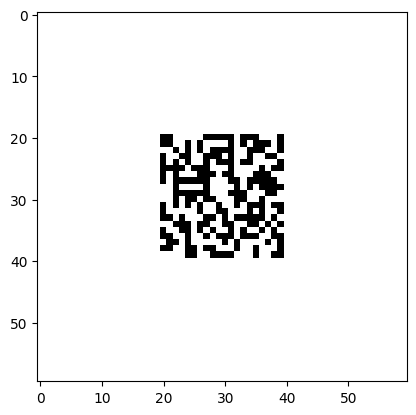

In [37]:
t=Tablero(60,60)
for j in range(len(individuos[0])):
      if individuos[0][j]==1:
        t.dibujar(j%dim+20,j//dim+20)

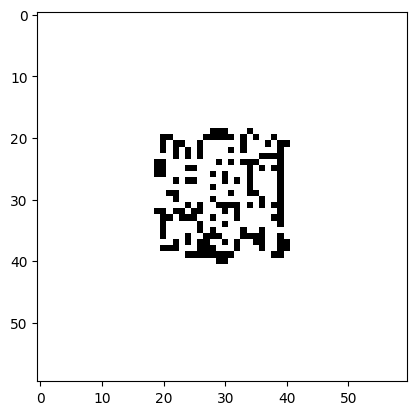

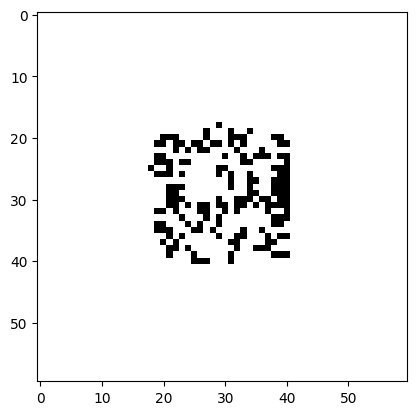

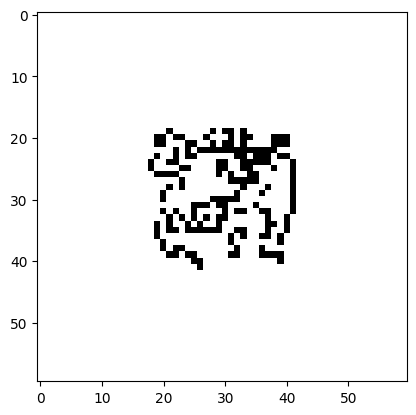

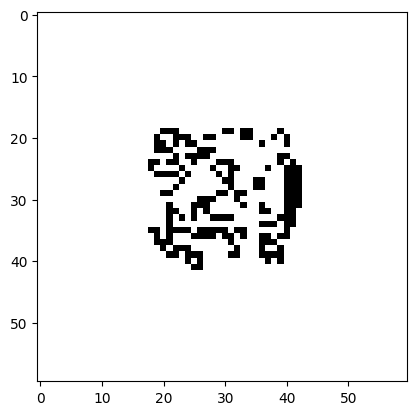

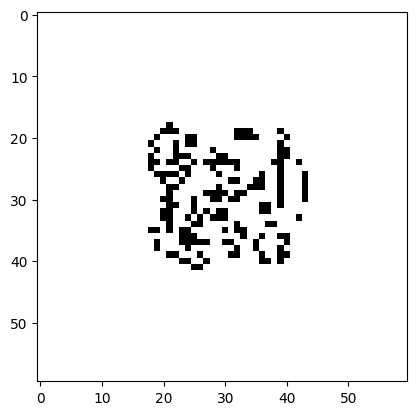

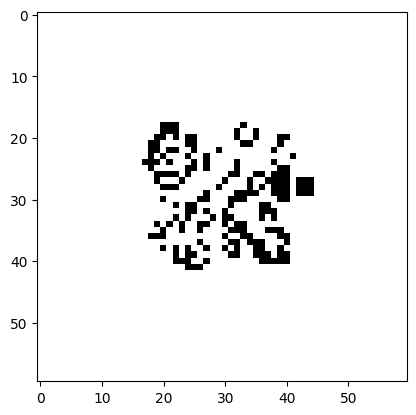

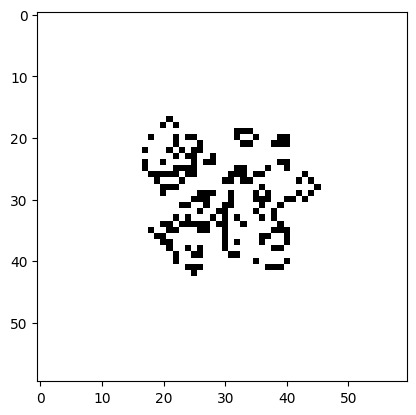

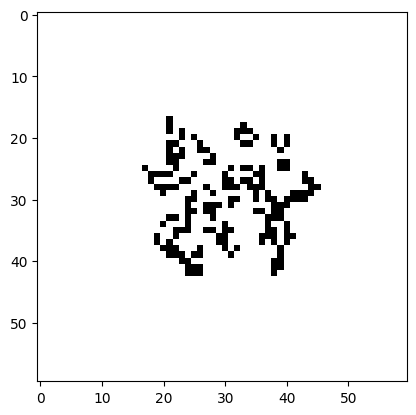

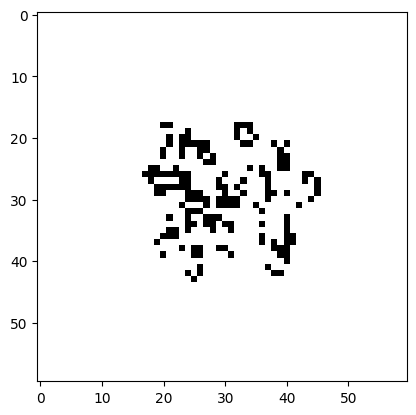

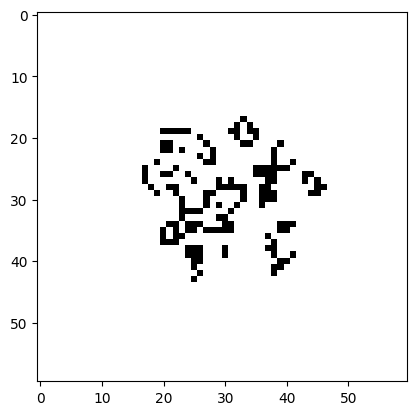

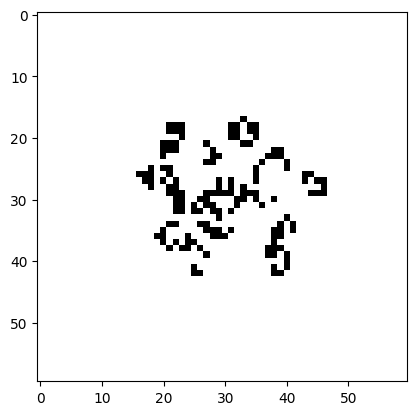

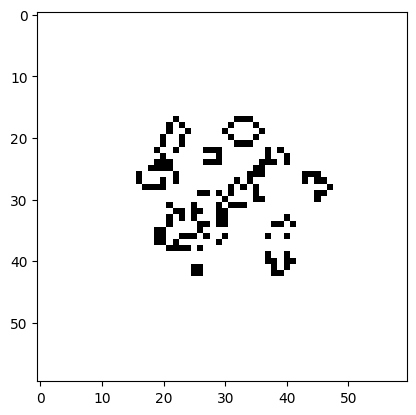

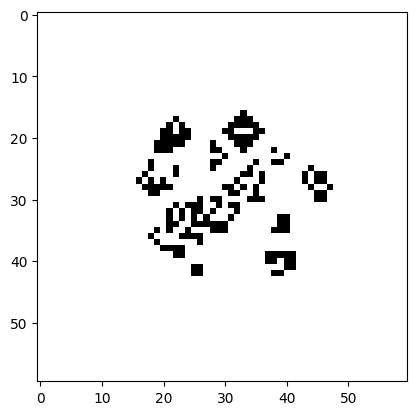

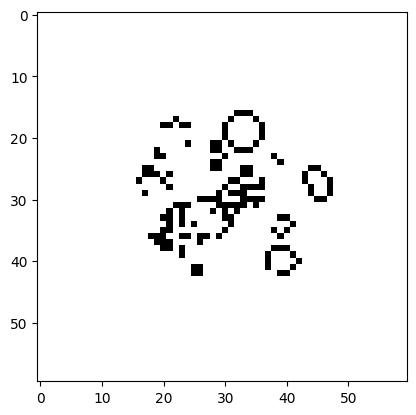

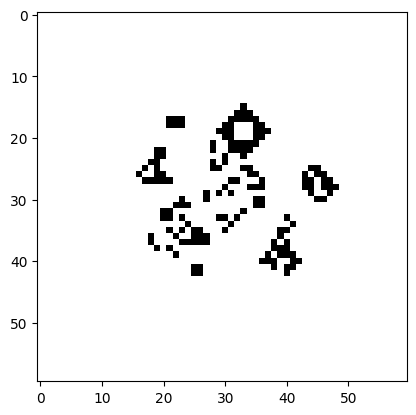

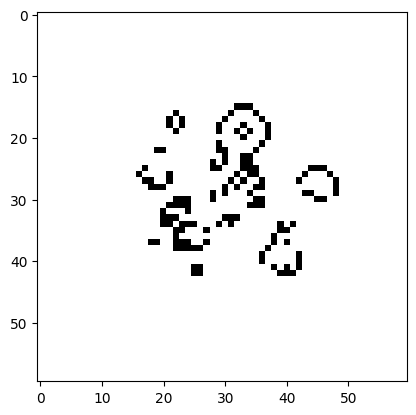

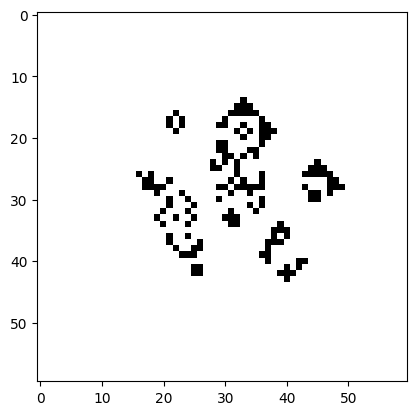

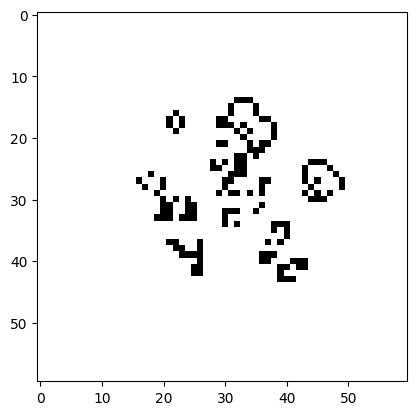

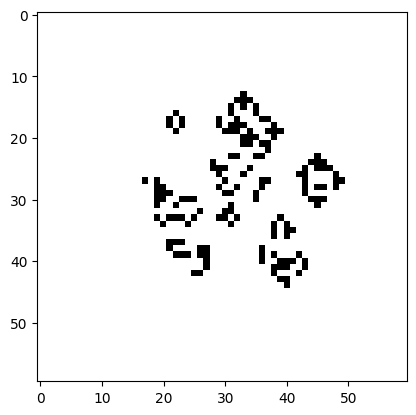

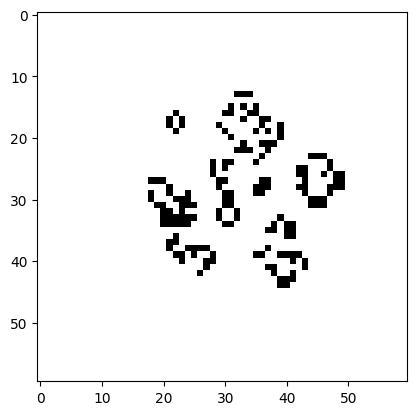

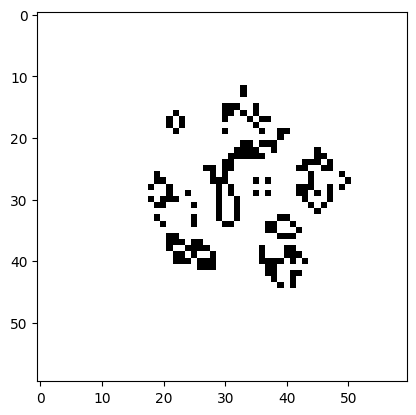

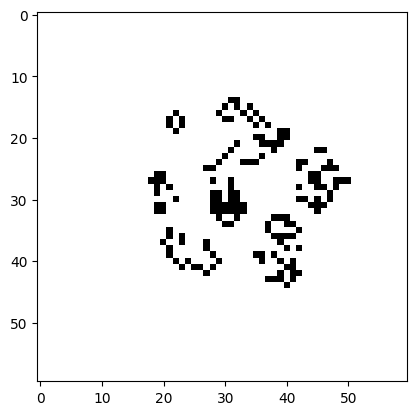

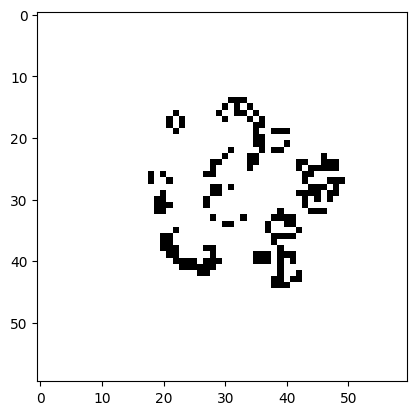

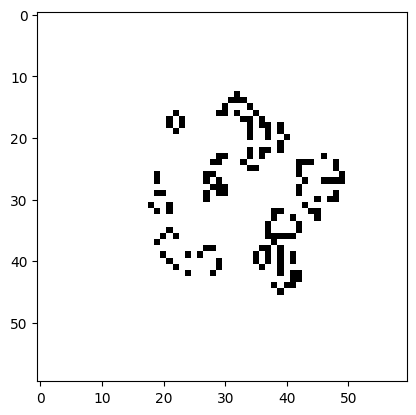

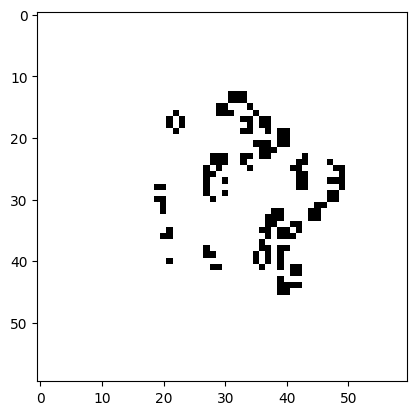

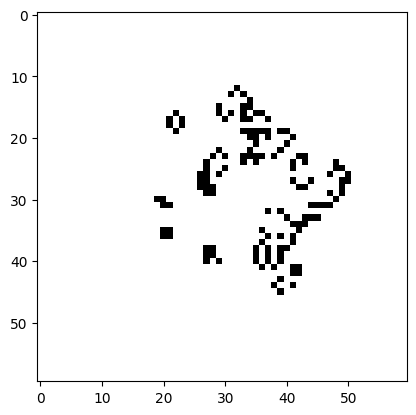

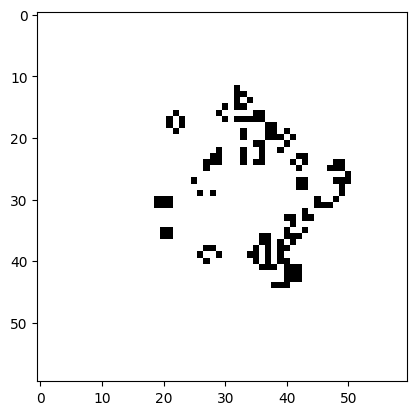

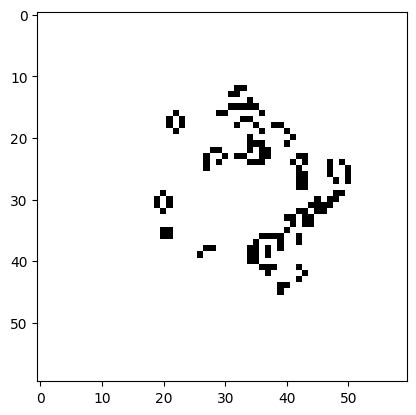

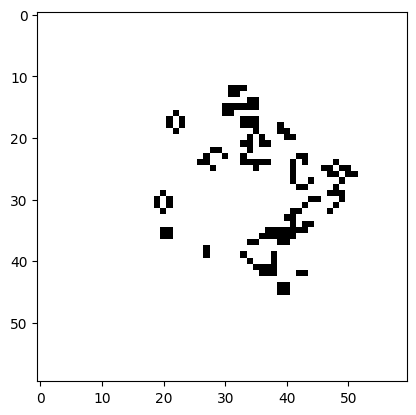

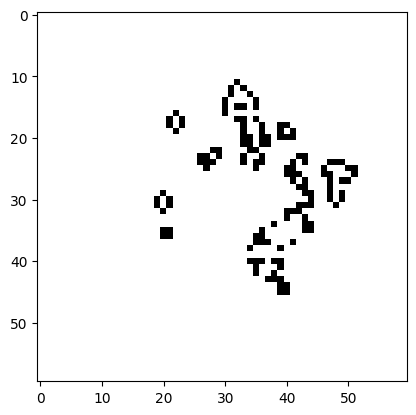

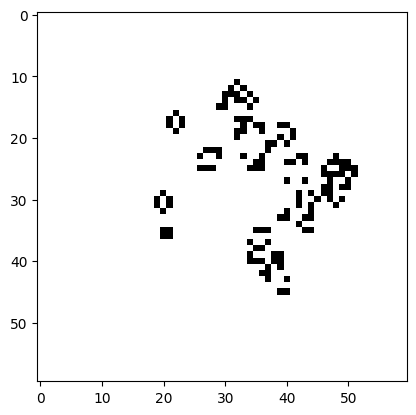

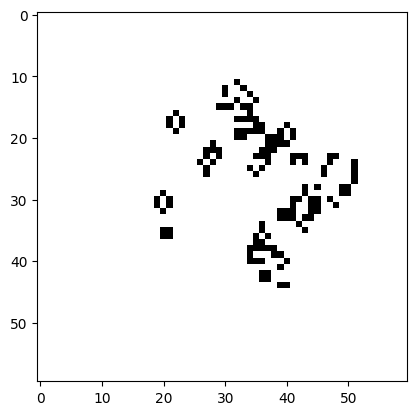

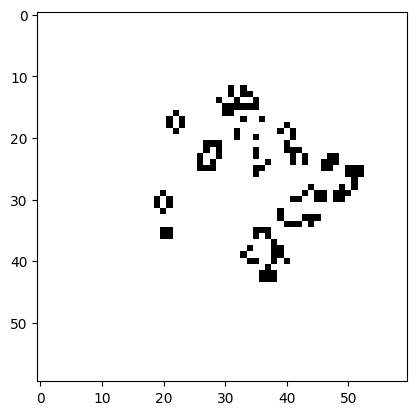

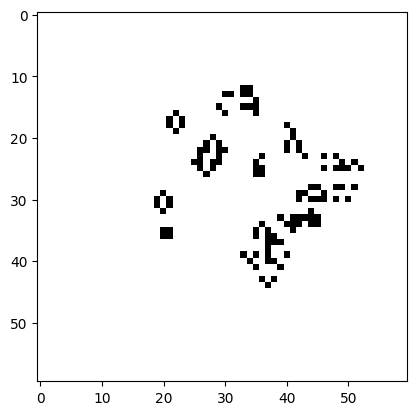

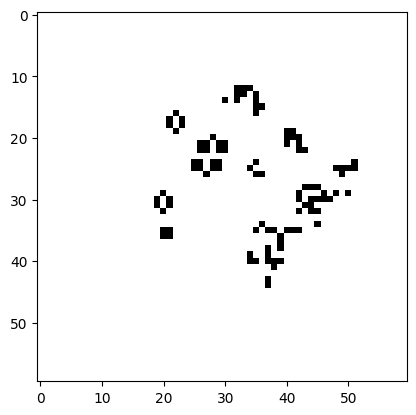

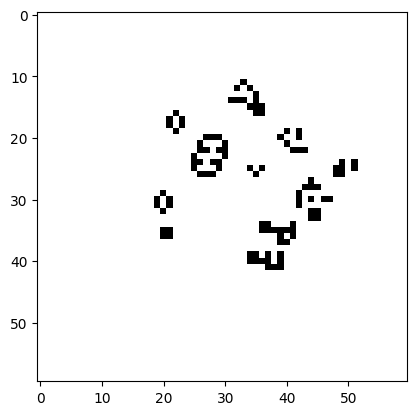

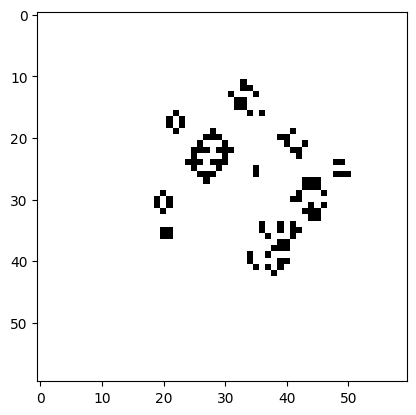

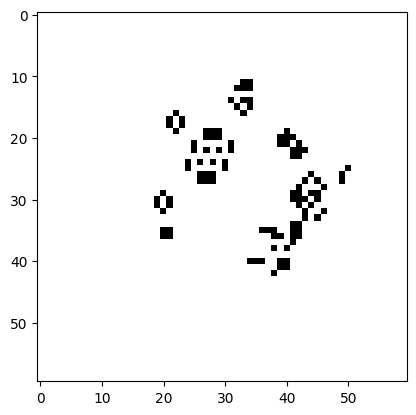

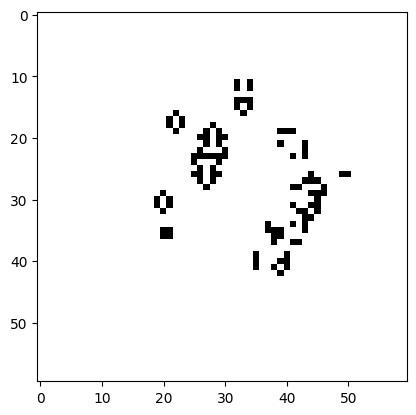

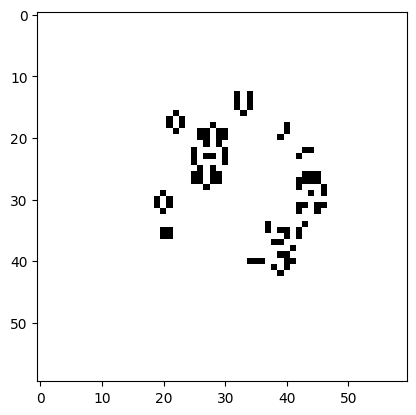

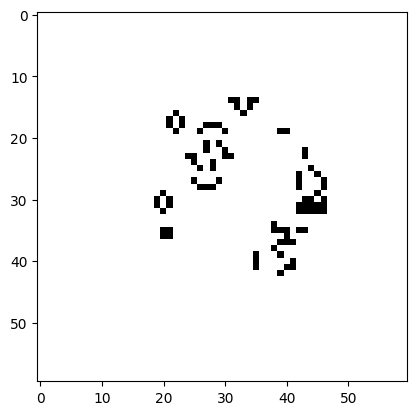

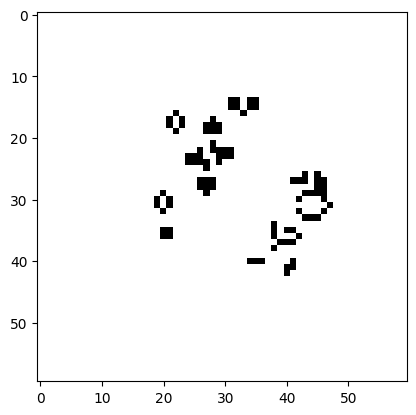

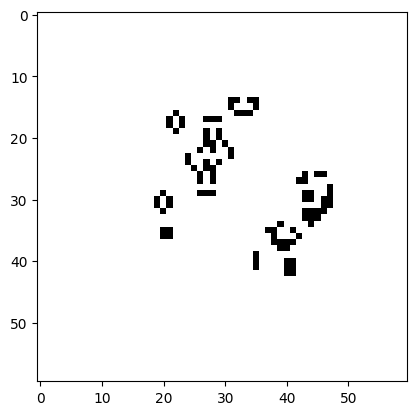

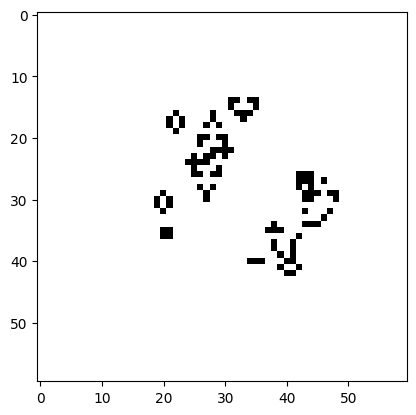

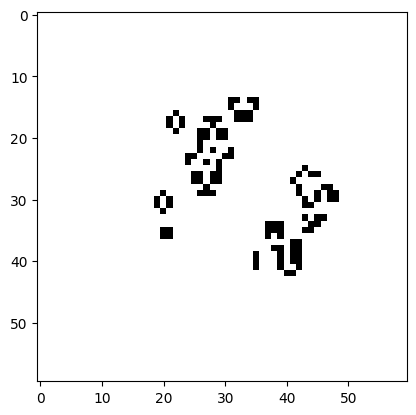

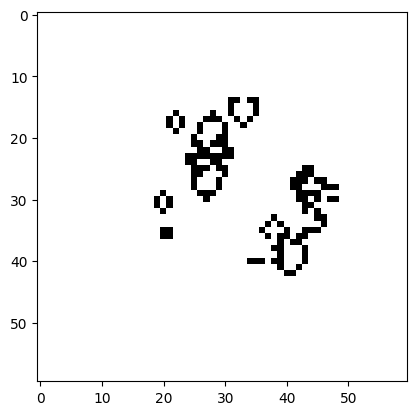

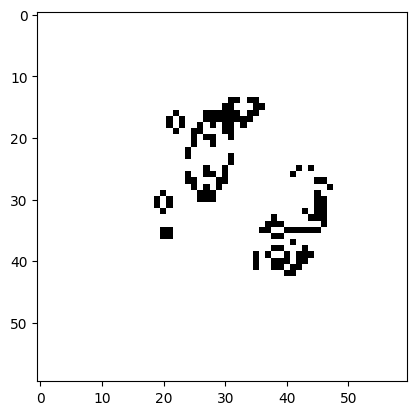

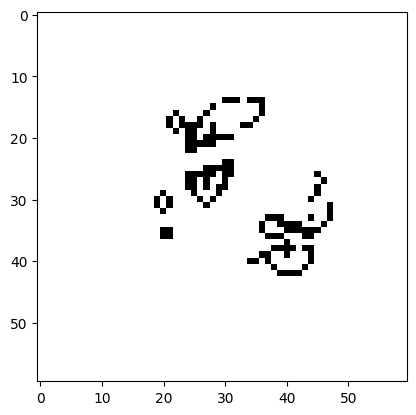

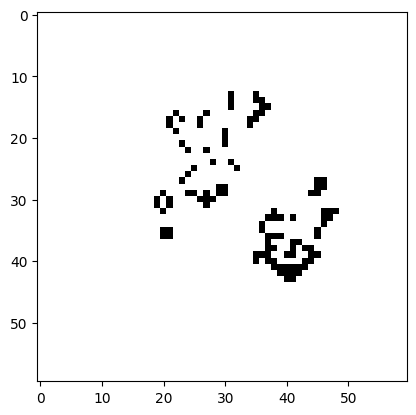

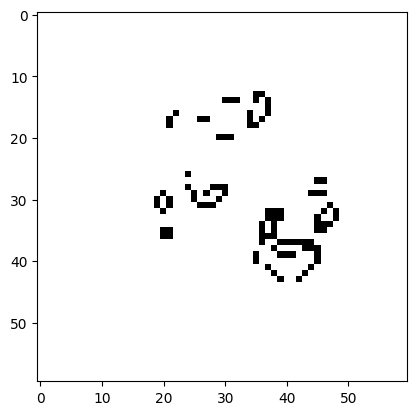

In [38]:
for i in range(50):
  t.paso()
  plt.show()